In [ ]:
#!pip install mlxtend  
#! pip install --index-url https://test.pypi.org/simple/ PyARMViz

In [1]:
# basics
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import style
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from collections import Counter
import datetime as dt
import seaborn as sns
# market basket analysis and visualisation
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import networkx as nx
#from PyARMViz import PyARMViz
#from PyARMViz.Rule import generate_rule_from_dict
sns.set()
#%matplotlib inline
#matplotlib.rcParams['figure.figsize'] = (18, 18)
#style.use('ggplot')


In [2]:
df=pd.read_csv('2019.csv')

In [3]:
df = df[['Family','week','store']]

In [4]:
df['week'] = pd.to_datetime(df['week'])

In [5]:
df

,Family,week,store
0,21,2019-01-01,69
1,21,2019-01-01,52
2,21,2019-01-01,209
3,21,2019-01-01,74
4,21,2019-01-01,51
...,...,...,...
20972572,21,2019-11-01,314
20972573,21,2019-11-01,393
20972574,21,2019-11-01,62
20972575,21,2019-11-01,209


In [6]:
# Check family product sells
df['Family'].value_counts()


12    4497827
9     4419158
1     3502871
21    3002867
2     1080691
15    1063874
18     704272
14     583537
8      443970
3      337852
16     285012
6      231206
10     217140
5      119162
13     112072
7      105380
11      88236
19      69209
20      39156
17      39010
4       30075
Name: Family, dtype: int64

In [7]:
df['month'] = df['week'].dt.month

In [8]:
df['order_id'] = df['store'].astype(str)+'.'+df['week'].astype(str)

In [9]:
first_quarter = df.loc[(df['month']==1) | (df['month']== 2) | (df['month']== 3)| (df['month']== 4)]

In [10]:
second_quarter = df.loc[(df['month']==5) | (df['month']== 6) | (df['month']== 7)| (df['month']== 8)]

In [11]:
third_quarter = df.loc[(df['month']==9) | (df['month']== 10) | (df['month']== 11)| (df['month']== 12)]

In [12]:
first_quarter =first_quarter[['order_id','Family']] 

In [14]:
# INPUTS
#Stores [1-410]
#Quarters ['first_quarter','second_quarter','third_quarter']
#Family [1-21]



def co_occurences(store,quarter,family):
    '''
    given a store, a quarter and a family of products.
    it provides a visualization with the co-occurences between the families of products.
    
    '''
    
    df = quarter[quarter['store'] == store]
    df =df[['order_id','Family']] 
    
    # Pivot the data - lines as orders and products as columns
    pt1 = pd.pivot_table(df, index='order_id', columns='Family',aggfunc=lambda x: 1 if len(x)>0 else 0).fillna(0)
    
    # calculate co-occurrence matrix
    x = np.array(pt1)
    y = np.array(pt1.T)
    co_matrix = np.dot(y,x)
    np.fill_diagonal(co_matrix, 0)
    quarter = pd.DataFrame(co_matrix, columns = pt1.columns, index = pt1.columns)

 
    
    
    
    quarter['Family'] = quarter.index
    ax = sns.barplot(x='Family', y=family, data=quarter,
                 palette="Blues_d")
    ax.set(xlabel='Family', ylabel='Co-ocurrences')
    
    return(quarter[family],ax)


(Family
1       0.0
2     123.0
3     122.0
4      53.0
5     109.0
6     121.0
7     113.0
8     123.0
9     123.0
10    123.0
11    120.0
12    123.0
13    106.0
14    123.0
15    123.0
16    120.0
17     41.0
18    123.0
19    107.0
20     61.0
21    123.0
Name: 1, dtype: float64, <AxesSubplot:xlabel='Family', ylabel='Co-ocurrences'>)


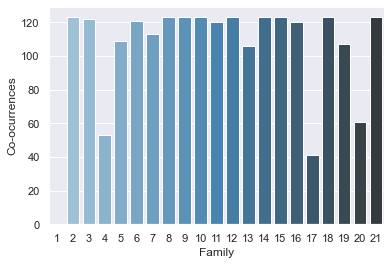

In [15]:
print(co_occurences(292,second_quarter,1))

In [16]:
# Pivot the data - lines as orders and products as columns
pt1 = pd.pivot_table(first_quarter, index='order_id', columns='Family', 
                    aggfunc=lambda x: 1 if len(x)>0 else 0).fillna(0)
pt1.head()

Family,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
order_id,,,,,,,,,,,,,,,,,,,,,
1.2019-01-01,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1.2019-01-02,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
1.2019-01-03,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
1.2019-01-04,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
1.2019-01-05,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0


In [17]:
# calculate co-occurrence matrix
x = np.array(pt1)
y = np.array(pt1.T)
co_matrix = np.dot(y,x)
np.fill_diagonal(co_matrix, 0)
quarter = pd.DataFrame(co_matrix, columns = pt1.columns, index = pt1.columns)
quarter.describe()

Family,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,...,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,35466.857143,35150.761905,32948.285714,9838.238095,28185.571429,29863.952381,24689.714286,34111.380952,35445.047619,29233.857143,...,35451.095238,29533.523810,35426.047619,35425.476190,33485.333333,15481.714286,34792.428571,21123.619048,14138.904762,35346.761905
std,13916.612276,13721.891232,12648.116742,3111.002891,10566.650768,11259.682604,8994.118618,13146.710613,13901.501464,10861.580457,...,13904.786431,11069.978725,13888.857997,13886.749438,12884.614578,5136.964699,13516.330773,7422.535749,4589.457037,13834.766807
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26255.000000,26180.000000,25132.000000,9167.000000,22021.000000,23272.000000,19679.000000,25793.000000,26253.000000,22943.000000,...,26256.000000,22559.000000,26246.000000,26251.000000,25206.000000,13859.000000,26078.000000,19679.000000,12525.000000,26233.000000
50%,38538.000000,38339.000000,36323.000000,11424.000000,34319.000000,36323.000000,29633.000000,37457.000000,38524.000000,35230.000000,...,38536.000000,35523.000000,38508.000000,38520.000000,36490.000000,17970.000000,38056.000000,25132.000000,16093.000000,38470.000000
75%,47006.000000,46766.000000,43067.000000,11943.000000,36054.000000,38470.000000,31116.000000,44882.000000,46994.000000,37502.000000,...,46988.000000,38077.000000,46910.000000,46911.000000,44038.000000,18985.000000,46081.000000,26233.000000,17303.000000,46766.000000
max,47756.000000,47006.000000,43173.000000,11956.000000,36117.000000,38538.000000,31160.000000,45021.000000,47729.000000,37548.000000,...,47756.000000,38190.000000,47687.000000,47681.000000,44226.000000,19005.000000,46266.000000,26256.000000,17324.000000,47478.000000


In [18]:
# Pivot the data - lines as orders and products as columns
pt2 = pd.pivot_table(second_quarter, index='order_id', columns='Family', 
                    aggfunc=lambda x: 1 if len(x)>0 else 0).fillna(0)
pt2.head()

month                                               ... week  \
Family          1    2    3    4    5    6    7    8    9    10  ...   12   
order_id                                                         ...        
1.2019-05-01   1.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  ...  1.0   
1.2019-05-02   1.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  1.0  1.0  ...  1.0   
1.2019-05-03   1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0   
1.2019-05-04   1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0   
1.2019-05-05   1.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  1.0  0.0  ...  1.0   

                                                           
Family         13   14   15   16   17   18   19   20   21  
order_id                                                   
1.2019-05-01  1.0  1.0  1.0  1.0  0.0  1.0  0.0  0.0  1.0  
1.2019-05-02  0.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  
1.2019-05-03  0.0  1.0  1.0  1.0  0.0  1.0  0.0  0.0  1.0  
1.2019-05-04  1.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  1.0  
1.2019-05-05  0.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  

[5 rows x 63 columns]

In [19]:
# Pivot the data - lines as orders and products as columns
pt3 = pd.pivot_table(third_quarter, index='order_id', columns='Family', 
                    aggfunc=lambda x: 1 if len(x)>0 else 0).fillna(0)
pt3.head()

month                                               ... week  \
Family          1    2    3    4    5    6    7    8    9    10  ...   12   
order_id                                                         ...        
1.2019-09-01   1.0  1.0  1.0  0.0  0.0  1.0  0.0  1.0  1.0  1.0  ...  1.0   
1.2019-09-02   1.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  1.0  1.0  ...  1.0   
1.2019-09-03   1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  ...  1.0   
1.2019-09-04   1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  ...  1.0   
1.2019-09-05   1.0  1.0  1.0  0.0  0.0  1.0  0.0  1.0  1.0  1.0  ...  1.0   

                                                           
Family         13   14   15   16   17   18   19   20   21  
order_id                                                   
1.2019-09-01  0.0  1.0  1.0  1.0  0.0  1.0  0.0  1.0  1.0  
1.2019-09-02  0.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  1.0  
1.2019-09-03  1.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  
1.2019-09-04  1.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  
1.2019-09-05  1.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  

[5 rows x 63 columns]

In [20]:
frequent_itemsets = apriori(pt1, min_support=0.65, use_colnames=True) #frequent itemsets with >65% support

In [21]:
frequent_itemsets

,support,itemsets
0,0.994997,(1)
1,0.976730,(2)
2,0.896519,(3)
3,0.749922,(5)
4,0.800324,(6)
...,...,...
11417,0.689805,"(2, 3, 8, 9, 12, 13, 14, 15, 16, 18, 21)"
11418,0.669296,"(1, 2, 3, 5, 8, 9, 12, 14, 15, 16, 18, 21)"
11419,0.703029,"(1, 2, 3, 6, 8, 9, 12, 14, 15, 16, 18, 21)"
11420,0.685488,"(1, 2, 3, 8, 9, 10, 12, 14, 15, 16, 18, 21)"


In [22]:
# Generate the association rules - by confidence. Finding complementary products with confidence higher than 60%
rulesConfidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
rulesConfidence.sort_values(by='confidence', ascending=False, inplace=True)
rulesConfidence.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
608501,"(2, 3, 8, 13, 14, 16, 21)",(1),0.693210,0.994997,0.693210,1.0,1.005028,0.003468,inf
1656566,"(2, 3, 8, 10, 14, 15, 16, 18, 21)","(1, 9)",0.685508,0.990783,0.685508,1.0,1.009303,0.006318,inf
385642,"(6, 8, 10, 15, 18, 21)",(1),0.651589,0.994997,0.651589,1.0,1.005028,0.003260,inf
385516,"(6, 8, 10, 14, 18, 21)",(1),0.651651,0.994997,0.651651,1.0,1.005028,0.003260,inf
232298,"(8, 10, 16, 18, 21)",(9),0.718016,0.992776,0.718016,1.0,1.007277,0.005187,inf


In [23]:
#the likelihood of buying the products together is way more than the likelihood of buying the products separated
rulesLift = association_rules(frequent_itemsets, metric="lift", min_threshold=0)
rulesLift.sort_values(by='lift', ascending=False, inplace=True)
rulesLift.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1709182,"(3, 8, 9, 12, 15, 16, 21)","(1, 2, 5, 14, 18)",0.818695,0.740560,0.669296,0.817516,1.103915,0.063003,1.421711
1710219,"(1, 2, 5, 14, 18)","(3, 8, 9, 12, 15, 16, 21)",0.740560,0.818695,0.669296,0.903770,1.103915,0.063003,1.884081
1710031,"(3, 8, 9, 12, 16, 21)","(1, 2, 5, 14, 15, 18)",0.818903,0.740373,0.669296,0.817308,1.103914,0.063002,1.421121
1708777,"(1, 3, 8, 9, 12, 16, 21)","(2, 5, 14, 15, 18)",0.818903,0.740373,0.669296,0.817308,1.103914,0.063002,1.421121
1700361,"(3, 8, 9, 12, 16, 21)","(2, 5, 14, 15, 18)",0.818903,0.740373,0.669296,0.817308,1.103914,0.063002,1.421121
1710624,"(2, 5, 14, 15, 18)","(1, 3, 8, 9, 12, 16, 21)",0.740373,0.818903,0.669296,0.903998,1.103914,0.063002,1.886395
1709370,"(1, 2, 5, 14, 15, 18)","(3, 8, 9, 12, 16, 21)",0.740373,0.818903,0.669296,0.903998,1.103914,0.063002,1.886395
1700624,"(2, 5, 14, 15, 18)","(3, 8, 9, 12, 16, 21)",0.740373,0.818903,0.669296,0.903998,1.103914,0.063002,1.886395
1708225,"(1, 3, 8, 9, 12, 15, 16, 21)","(2, 18, 5, 14)",0.818695,0.740581,0.669296,0.817516,1.103884,0.062986,1.421597
1701011,"(2, 18, 5, 14)","(3, 8, 9, 12, 15, 16, 21)",0.740581,0.818695,0.669296,0.903745,1.103884,0.062986,1.883586


In [ ]:
frequent_itemsets2 = apriori(pt2, min_support=0.65, use_colnames=True) #frequent itemsets with >65% support

In [ ]:
# Generate the association rules - by confidence. Finding complementary products with confidence higher than 60%
rulesConfidence = association_rules(frequent_itemsets2, metric="confidence", min_threshold=0.6)
rulesConfidence.sort_values(by='confidence', ascending=False, inplace=True)
rulesConfidence.head()

In [ ]:
#the likelihood of buying the products together is way more than the likelihood of buying the products separated
rulesLift = association_rules(frequent_itemsets2, metric="lift", min_threshold=0)
rulesLift.sort_values(by='lift', ascending=False, inplace=True)
rulesLift.head(10)

In [ ]:
frequent_itemsets3 = apriori(pt3, min_support=0.65, use_colnames=True) #frequent itemsets with >65% support

In [ ]:
# Generate the association rules - by confidence. Finding complementary products with confidence higher than 60%
rulesConfidence = association_rules(frequent_itemsets3, metric="confidence", min_threshold=0.6)
rulesConfidence.sort_values(by='confidence', ascending=False, inplace=True)
rulesConfidence.head()

In [ ]:
#the likelihood of buying the products together is way more than the likelihood of buying the products separated
rulesLift = association_rules(frequent_itemsets3, metric="lift", min_threshold=0)
rulesLift.sort_values(by='lift', ascending=False, inplace=True)
rulesLift.head(10)